# `scipy` tutorial

SciPy is a collection of mathematical algorithms and convenience functions built on the NumPy extension of Python. It adds significant power to the interactive Python session by providing the user with high-level commands and classes for manipulating and visualizing data. With SciPy, an interactive Python session becomes a data-processing and system-prototyping environment rivaling systems, such as MATLAB, IDL, Octave, R-Lab, and SciLab.

REF: https://docs.scipy.org/doc/scipy/tutorial/general.html 

### Overview

* Special functions (`scipy.special`)
* Integration (`scipy.integrate`)
* Optimization (`scipy.optimize`)
* Interpolation (`scipy.interpolate`)
* Fourier Transforms (`scipy.fft`)
* Signal Processing (`scipy.signal`)
* Linear Algebra (`scipy.linalg`)
* Sparse eigenvalue problems with ARPACK
* Compressed Sparse Graph Routines (`scipy.sparse.csgraph`)
* Spatial data structures and algorithms (`scipy.spatial`)
* Statistics (`scipy.stats`)
* Multidimensional image processing (`scipy.ndimage`)
* File IO (`scipy.io`)

### Installation

`scipy` can be installed by `conda install scipy`.

In [1]:
# uncomment the below line to install scipy (if you haven't)

#!conda install scipy

In [2]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from scipy import special
from scipy import integrate
from scipy import interpolate
from scipy import optimize
from scipy import stats

## Integration

In [3]:
help(integrate)

Help on package scipy.integrate in scipy:

NAME
    scipy.integrate

DESCRIPTION
    Integration and ODEs (:mod:`scipy.integrate`)
    
    .. currentmodule:: scipy.integrate
    
    Integrating functions, given function object
    
    .. autosummary::
       :toctree: generated/
    
       quad          -- General purpose integration
       quad_vec      -- General purpose integration of vector-valued functions
       dblquad       -- General purpose double integration
       tplquad       -- General purpose triple integration
       nquad         -- General purpose N-D integration
       fixed_quad    -- Integrate func(x) using Gaussian quadrature of order n
       quadrature    -- Integrate with given tolerance using Gaussian quadrature
       romberg       -- Integrate func using Romberg integration
       newton_cotes  -- Weights and error coefficient for Newton-Cotes integration
       IntegrationWarning -- Warning on issues during integration
       AccuracyWarning  -- Warnin

### General integration (`quad`)

The PI calculation agin.

In [4]:
# define a half circule function with radius r
def hcirc(x, r):
    return np.sqrt(r**2 - x**2)

In [5]:
r = 1 # unit circle
# I = integrate.quad(hcirc,-1,1, args=r)
I = integrate.quad(lambda x, r: np.sqrt(r**2 - x**2),-1,1, args=r)

In [6]:
print(I)          # the integral (result, error)
print(np.pi*r**2) # real pi
print(2*I[0])     # calculated pi

(1.5707963267948992, 1.0002361161554063e-09)
3.141592653589793
3.1415926535897984


`scipi.integrate.quad` can hanld `inf` or `-inf` as well.

Consider the integral:

$\begin{equation}
E_n(x) = \int_1^\infty \frac{e^{-xt}}{t^n} dt.
\end{equation}$

In [7]:
def integrand(t,n,x):
    return np.exp(-x*t)/t**n

In [8]:
n = 1
x = 2

I = integrate.quad(integrand, 1, np.inf, args=(n,x)) # args --> not implemented to integrate parameters
print(I)

(0.04890051070805327, 3.8165623257839193e-10)


The integral is actuall the special function `special.expn()`.

If we don't know this special function, we could create one by oursefl.

In [9]:
def expint(n,x):
    return integrate.quad(integrand, 1, np.inf, args=(n,x))[0] # result, error. we only take the result

In [10]:
# vectorize the function
vec_expint = np.vectorize(expint)

In [11]:
vec_expint(3, np.arange(1,4,0.5))

array([0.10969197, 0.05673949, 0.03013338, 0.01629537, 0.00893065,
       0.00494538])

In [12]:
# the same as the special function `expn`
special.expn(3, np.arange(1,4,0.5))

array([0.10969197, 0.05673949, 0.03013338, 0.01629537, 0.00893065,
       0.00494538])

Additional special functions: https://docs.scipy.org/doc/scipy/reference/special.html#module-scipy.special 

### Exercise 1:

Create a new function named `black_body(T)` to perform the below integral:

$\begin{equation}
\int_0^\infty B_\nu(T) d\nu,
\end{equation}$
where
$\begin{equation}
B_\nu(T)= \frac{2h\nu^3}{c^2}\frac{1}{e^{h\nu/kT} -1}.
\end{equation}$

1. Set the temperature T = 6000 K and check if the integral yeilds $\frac{\sigma_B T^4}{\pi}$.
2. Use the function `black_body()` to calculate the integral with T=3000, 5000, 7000, and 12000 K.

In [61]:
# pi = np.pi
# h = 6.626e-27  # [erg s] is the Planch constant
# c = 2.9979e10  # [cm/s] is the light speed
# k = 1.38e-16  # [erg/K] is the Boltzmann constant
# sB = (2 * pi**5 * k**4) / (15 * c**2 * h**3)  # the Stefan-Boltzmann constant
# print(sB)

import scipy.constants as const

pi = const.pi
h = const.h
c = const.c
k = const.k
T = 6000

In [83]:
# TODO


def black_body(x, T):
    tor = 1e-20
    return (2 * h * x**3) / (c**2 * (np.exp(h * x / (k * T)) - 1) + tor)


T = 6000
boltz = integrate.quad(black_body, 0, 1e18, args=T)[0] * pi / T**4
print(boltz)

T = 3000
I_t3 = integrate.quad(black_body, 0, 1e18, args=T)[0] * pi / T**4
T = 5000
I_t5 = integrate.quad(black_body, 0, 1e18, args=T)[0] * pi / T**4
T = 7000
I_t7 = integrate.quad(black_body, 0, 1e18, args=T)[0] * pi / T**4
T = 12000
I_t12 = integrate.quad(black_body, 0, 1e18, args=T)[0] * pi / T**4
print(I_t3)
print(I_t5)
print(I_t7)
print(I_t12)

5.670374419184434e-08
5.670374419184434e-08
5.6703744191844294e-08
5.6703744191844334e-08
5.670374419184434e-08


/var/folders/6m/8m1_nvcx5dj45blhn0kz5x400000gn/T/ipykernel_24158/3325321989.py:7: RuntimeWarning: overflow encountered in exp
  return (2 * h * x**3) / (c**2 * (np.exp(h * x / (k * T)) - 1) + tor)
/var/folders/6m/8m1_nvcx5dj45blhn0kz5x400000gn/T/ipykernel_24158/3325321989.py:7: RuntimeWarning: overflow encountered in scalar multiply
  return (2 * h * x**3) / (c**2 * (np.exp(h * x / (k * T)) - 1) + tor)


### Integrating using Samples

In [15]:
# define a half circule function with radius r
def hcirc(x):
    return np.sqrt(1 - x**2)

In [16]:
x = np.linspace(-1,1,1024, endpoint=True)
y = hcirc(x)

I1 = integrate.trapezoid(y,x)
I2 = integrate.simpson(y,x)
print(f"[trapezoid] Pi = {2*I1}")
print(f"[simpson]   Pi = {2*I2}")

[trapezoid] Pi = 3.1414910038609802
[simpson]   Pi = 3.1415317337209605


### Exercise 2:

Re-do the question in Exericse 1.1, but use `integrate.trapezoid()` and `integrate.simpson()`.

In [17]:
# TODO:
















## Ordinary differential equations

### Initial value problems (`solve_ivp`)

Recall that in the angry bird problem, we solve the Newton's equation using the analytical solutions.\
However, in general scenarios, there could be more compliated forces (i.g. air resistance, drag force, damping forced, ...etc. ).

In principle, we solve the system from the first principle, i.e. solving the Newton's law ($F=ma$).

In Cartesian cooridnates, the Newton's equation can be decribed by $F= m \ddot{x}$, or

$\begin{align}
\dot{x} &= v_x,\\
\dot{y} &= v_y,\\
\dot{v_x} &= F_x/m,\\
\dot{v_y} &= F_y/m,
\end{align}$

which are four 1st order ODEs.

For a given initial conidtion ($x,y,v_x,v_y$ at $t=0$), the system is an initial value problem (IVP).\
Therefore, we could use `scipy.integrate.solve_ivp` to solve it.

For naming convention, let's define:

$\begin{align}
y_1 &= x,\\
y_2 &= y,\\
y_3 &= v_x,\\
y_4 &= v_y,
\end{align}$

and

$\begin{equation}
y(t)=
\begin{pmatrix}
y_1(t)\\
y_2(t)\\
y_3(t)\\
y_4(t)
\end{pmatrix}
\end{equation}$

and the IVP is

$\begin{equation}
y' = f(y,t)=
\begin{pmatrix}
y_3(t)\\
y_4(t)\\
F_x(t)/m\\
F_y(t)/m
\end{pmatrix}
\end{equation}$

REF: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp

In [18]:
# define the y' function

def yderive(t,y,m,fx,fy):
    yout = np.ones(len(y))
    yout[0] = y[2]  # vx
    yout[1] = y[3]  # vy
    yout[2] = fx/m  # Fx/m = a_x
    yout[3] = fy/m  # Fy/m = a_y
    return yout     

In [19]:
# initial condition
y0     = np.array([0,0,30,35]) # [x,y,vx,vy]
t_span = [0, 7]                # from 0 to 2 seconds
m      = 1
fx     = 0
fy     = -9.8*m
solution = integrate.solve_ivp(yderive, t_span=t_span, y0= y0, args=(m,fx,fy))

In [20]:
print(solution)

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  3.068e-05  3.375e-04  3.405e-03  3.408e-02
             3.409e-01  3.409e+00  7.000e+00]
        y: [[ 0.000e+00  9.203e-04 ...  1.023e+02  2.100e+02]
            [ 0.000e+00  1.074e-03 ...  6.237e+01  4.900e+00]
            [ 3.000e+01  3.000e+01 ...  3.000e+01  3.000e+01]
            [ 3.500e+01  3.500e+01 ...  1.595e+00 -3.360e+01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 44
     njev: 0
      nlu: 0


In [21]:
# the analytical solution
times = np.linspace(t_span[0],t_span[1],1024, endpoint=True)
posx  = y0[2] * times
posy  = y0[3] * times - 0.5*9.8*times**2

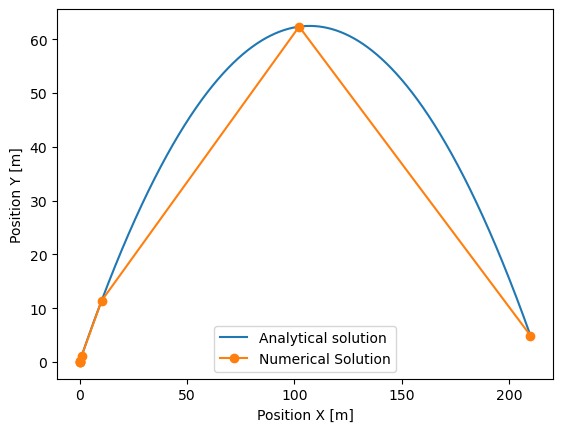

In [22]:
plt.plot(posx,posy,'-', label="Analytical solution")
plt.plot(solution.y[0], solution.y[1],'-o', label="Numerical Solution")
plt.xlabel("Position X [m]")
plt.ylabel("Position Y [m]")
plt.legend(loc="best")

You could see that there are only a few data point in the trajectroy.\
It is becaue the numerical method we used allowed a very big time step.\

To have more data point, you

In [23]:
# initial condition
y0     = np.array([0,0,30,35]) # [x,y,vx,vy]
t_span = [0, 7]                # from 0 to 2 seconds
t_eval = np.linspace(t_span[0], t_span[1], 64)
solution = integrate.solve_ivp(yderive, t_span=t_span, y0= y0, t_eval=t_eval, args=(m,fx,fy))

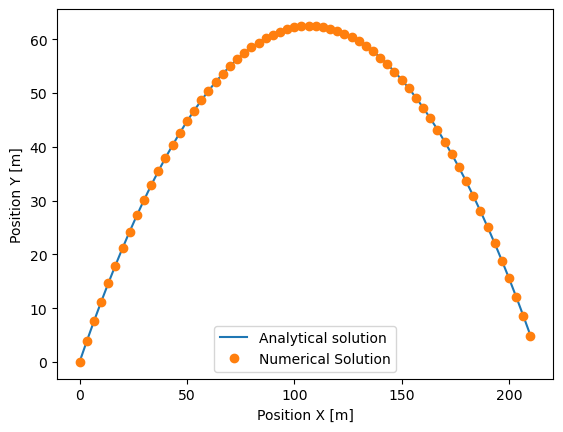

In [24]:
plt.plot(posx,posy,'-', label="Analytical solution")
plt.plot(solution.y[0], solution.y[1],'o', label="Numerical Solution")
plt.xlabel("Position X [m]")
plt.ylabel("Position Y [m]")
plt.legend(loc="best")

## Exercise 3

Now, consider a drag force $F = - K \eta v$ in your simulation, where $K$ is the frag coefficient and $\eta$ is the coefficient of viscosity. We could approximate your angry bird as a moving sphere, then the drag coefficient $K= 6 \pi R$, where $R$ is the radius of the sphere.

Assuming the angry bird is 5 kg, $R=30$ cm, calculate the trajectroy with:

1. $\eta = 0.0001$ (mks unit); air
2. $\eta = 0.01 $ (mks unit); water
3. $\eta = 0.1 $ (mks unit)

In [25]:
# TODO:





















## Interpolation

Data interpolation is one of the most common task in physics research.

In [26]:
# prepare some data to interpolate

x = np.linspace(0,2*np.pi, 12)
y = np.sin(x)

Text(0, 0.5, 'Y')

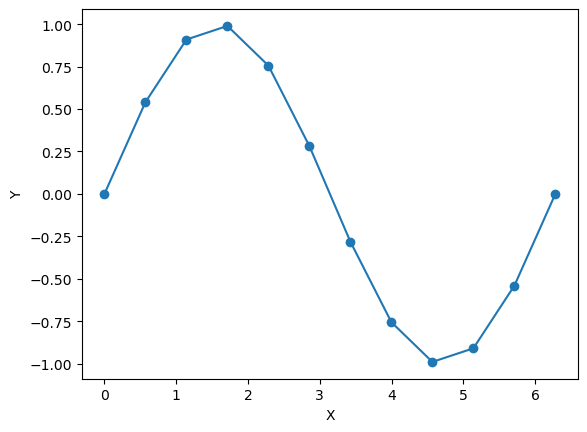

In [27]:
plt.plot(x,y,'o-')
plt.xlabel("X")
plt.ylabel("Y")

In [28]:
f1d = interpolate.interp1d(x,y)

In [29]:
x2 = np.linspace(0,2*np.pi, 128)
y2 = [f1d(x) for x in x2]

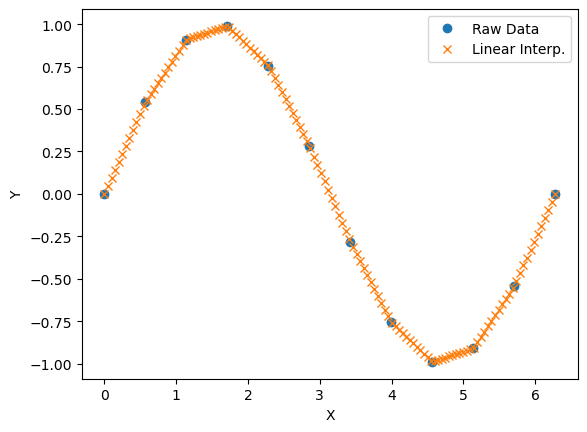

In [30]:
plt.plot(x,y,'o',label="Raw Data")
plt.plot(x2,y2,'x',label="Linear Interp.") # linear interpolation
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

In [31]:
f1d_cubic = interpolate.interp1d(x,y,kind='cubic')

The string (`kind`) has to be one of ‘linear’, ‘nearest’, ‘nearest-up’, ‘zero’, ‘slinear’, ‘quadratic’, ‘cubic’, ‘previous’, or ‘next’. ‘zero’, ‘slinear’, ‘quadratic’ and ‘cubic’ refer to a spline interpolation of zeroth, first, second or third order; ‘previous’ and ‘next’ simply return the previous or next value of the point; ‘nearest-up’ and ‘nearest’ differ when interpolating half-integers (e.g. 0.5, 1.5) in that ‘nearest-up’ rounds up and ‘nearest’ rounds down. Default is ‘linear’.

REF: https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d 

In [32]:
x3 = np.linspace(0,2*np.pi, 128)
y3 = [f1d_cubic(x) for x in x3]

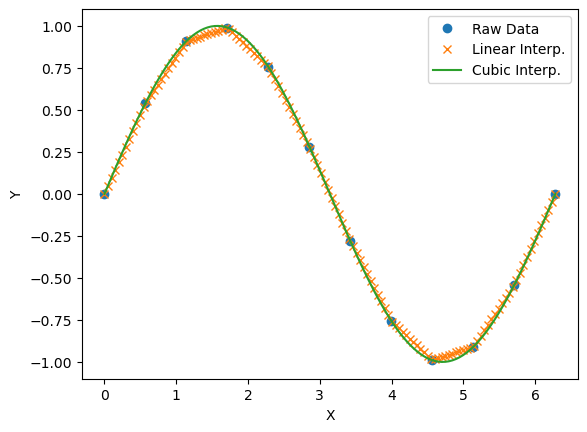

In [33]:
plt.plot(x,y,'o',label="Raw Data")
plt.plot(x2,y2,'x',label="Linear Interp.") # linear interpolation
plt.plot(x3,y3,'-',label="Cubic Interp.") # linear interpolation
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

## Optimization



In [34]:
rng = random.default_rng()

In [35]:
x = np.linspace(0,2*np.pi,64) + 0.5 * (rng.random(64))
y = np.sin(x) + 0.5 * rng.random(64)

x_true = np.linspace(0,2*np.pi,256)
y_true = np.sin(x_true)

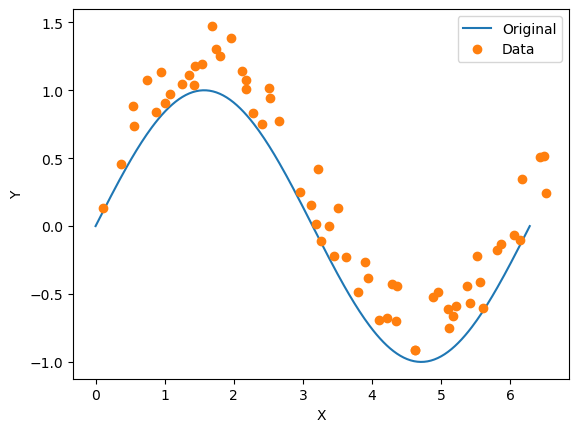

In [36]:
plt.plot(x_true,y_true,'-',label="Original")
plt.plot(x,y,'o',label="Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

In [37]:
# Fit the data to a function: A cos (B x) + C sin (D x) 

def func(x,a,b,c,d):
    return a * np.cos(b *x ) + c * np.sin(d * x)

In [38]:
popt, pcov = optimize.curve_fit(func, x, y)

In [39]:
print(popt)

[-0.43257118  0.7459893   1.30116117  1.0294442 ]


In [40]:
xx = np.linspace(0,2*np.pi, 128)
yy = func(xx, *popt)

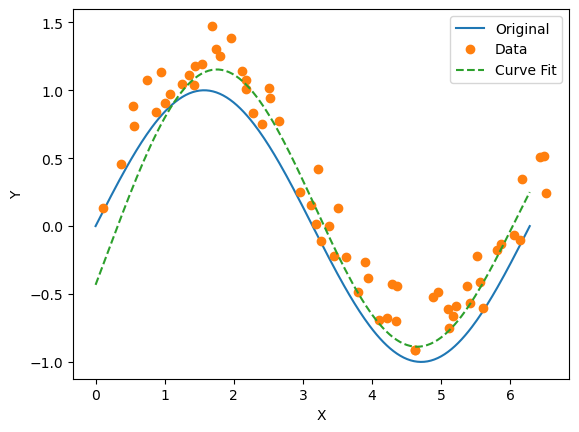

In [41]:
plt.plot(x_true,y_true,'-',label="Original")
plt.plot(x,y,'o',label="Data")
plt.plot(xx,yy,'--',label="Curve Fit")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

### Linear Fit 

In ML, a linear fit is called the linear regression.

In [42]:
# fake data
x = rng.random(10)
y = 1.6*x + rng.random(10)

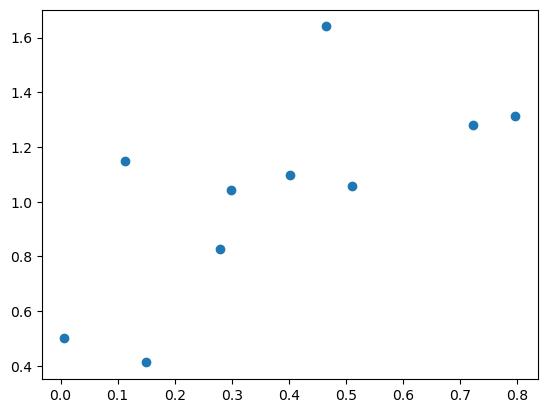

In [43]:
plt.plot(x,y,'o',label="Data")

In [44]:
def linear(x, m, b):
    return m*x + b

In [45]:
popt, pcov = optimize.curve_fit(linear, x, y)

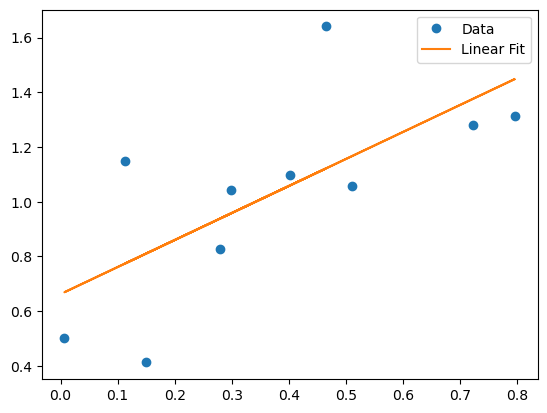

In [46]:
plt.plot(x,y,'o',label="Data")
plt.plot(x,linear(x,*popt),'-',label="Linear Fit")
plt.legend(loc='best')

In [47]:
res = stats.linregress(x, y)

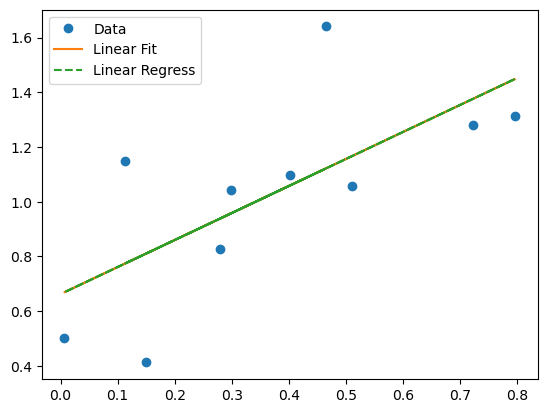

In [48]:
plt.plot(x,y,'o',label="Data")
plt.plot(x,linear(x,*popt),'-',label="Linear Fit")
plt.plot(x, res.intercept + res.slope*x, '--', label='Linear Regress')
plt.legend(loc='best')

In [49]:
def func_lsq(p, x, y):
    # want to minimize p[0] * x + p[1] - y
    return p[0]*x + p[1] - y

In [50]:
lsq = optimize.least_squares(func_lsq, x0=[1,0], args=(x,y))

In [51]:
print(lsq)

     message: `gtol` termination condition is satisfied.
     success: True
      status: 1
         fun: [ 1.126e-01 -5.197e-01  3.972e-01 -3.730e-01  9.633e-02
                1.366e-01  1.085e-01  1.683e-01 -8.759e-02 -3.922e-02]
           x: [ 9.885e-01  6.622e-01]
        cost: 0.3284543236371533
         jac: [[ 2.788e-01  1.000e+00]
               [ 4.641e-01  1.000e+00]
               ...
               [ 2.979e-01  1.000e+00]
               [ 4.024e-01  1.000e+00]]
        grad: [ 6.418e-09  3.268e-10]
  optimality: 6.417827987921892e-09
 active_mask: [ 0.000e+00  0.000e+00]
        nfev: 2
        njev: 2


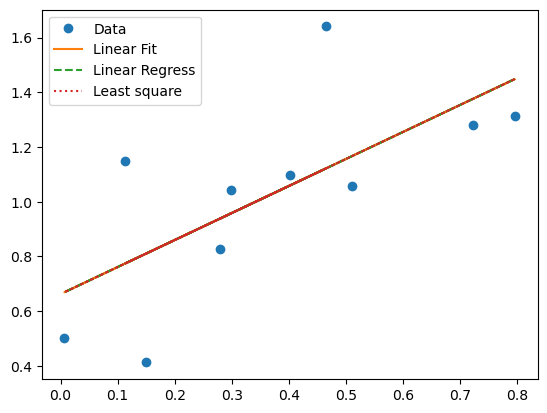

In [52]:
plt.plot(x,y,'o',label="Data")
plt.plot(x,linear(x,*popt),'-',label="Linear Fit")
plt.plot(x, res.intercept + res.slope*x, '--', label='Linear Regress')
plt.plot(x, lsq.x[0]*x + lsq.x[1],':',label="Least square" )
plt.legend(loc='best')